<a href="https://colab.research.google.com/github/jfv99/eda-inmobiliario/blob/main/EDA_Inmobiliario.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nbformat as nbf

nb = nbf.v4.new_notebook()
cells = []

cells.append(nbf.v4.new_markdown_cell("# EDA Inmobiliario\n"
"**Objetivo:** Identificar qué características de una casa influyen más en su precio de venta final.\n"
"**Dataset:** train.csv (Ames Housing)\n"))

# --- agrega aquí todas las celdas como lo generamos ---
# Para simplificar puedes copiar el código que ya te pasé en mi respuesta anterior,
# donde construíamos el notebook con nbformat y lo guardábamos.

nb["cells"] = cells

with open("EDA_Inmobiliario.ipynb", "w", encoding="utf-8") as f:
    nbf.write(nb, f)

print("✅ Notebook generado: EDA_Inmobiliario.ipynb")

✅ Notebook generado: EDA_Inmobiliario.ipynb


In [2]:
from google.colab import files
files.download("EDA_Inmobiliario.ipynb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# =========================
# 1. Carga e inspección inicial
# =========================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Subir el archivo en Colab
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("train.csv")

print("Forma del dataset:", df.shape)
display(df.head())
print(df.info())
print("\nValores nulos principales:")
print(df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False).head(20))


Saving train.csv to train (1).csv
Forma del dataset: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# =========================
# 2. Limpieza de datos
# =========================

# Copia de trabajo
df_clean = df.copy()

# Eliminar columnas con >40% nulos
cols_drop = ["PoolQC","MiscFeature","Alley","Fence"]
df_clean.drop(columns=cols_drop, inplace=True)

# Imputar numéricas con mediana
num_cols = ["LotFrontage","GarageYrBlt","MasVnrArea"]
num_imputer = SimpleImputer(strategy="median")
df_clean[num_cols] = num_imputer.fit_transform(df_clean[num_cols])

# Imputar categóricas con moda
cat_cols = ["GarageCond","GarageType","GarageFinish","GarageQual",
            "BsmtFinType2","BsmtExposure","BsmtQual","BsmtCond",
            "BsmtFinType1","MasVnrType","Electrical"]
cat_imputer = SimpleImputer(strategy="most_frequent")
df_clean[cat_cols] = cat_imputer.fit_transform(df_clean[cat_cols])

# FireplaceQu -> "None"
df_clean["FireplaceQu"] = df_clean["FireplaceQu"].fillna("None")

print("Forma después de limpieza:", df_clean.shape)
print("Nulos restantes:", df_clean.isnull().sum().sum())


Forma después de limpieza: (1460, 77)
Nulos restantes: 0


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


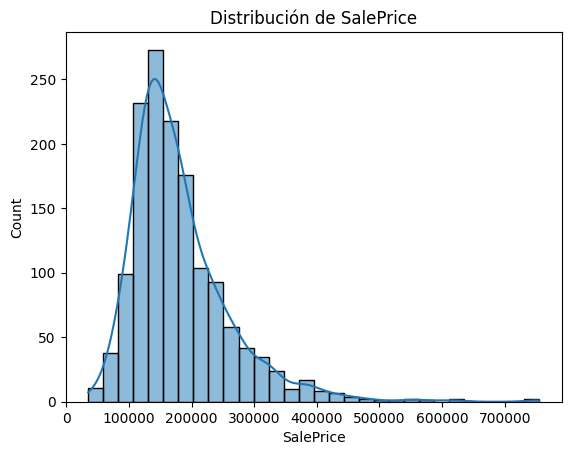

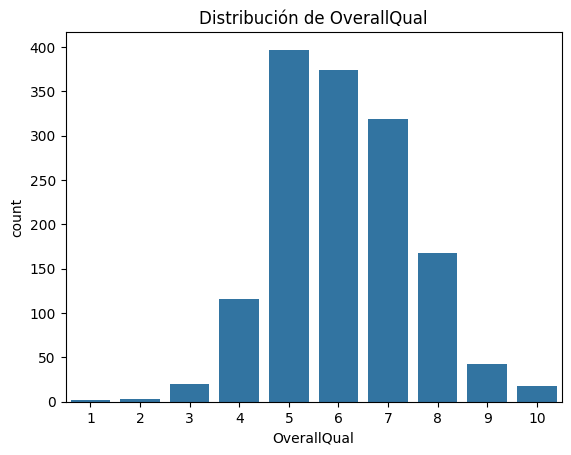

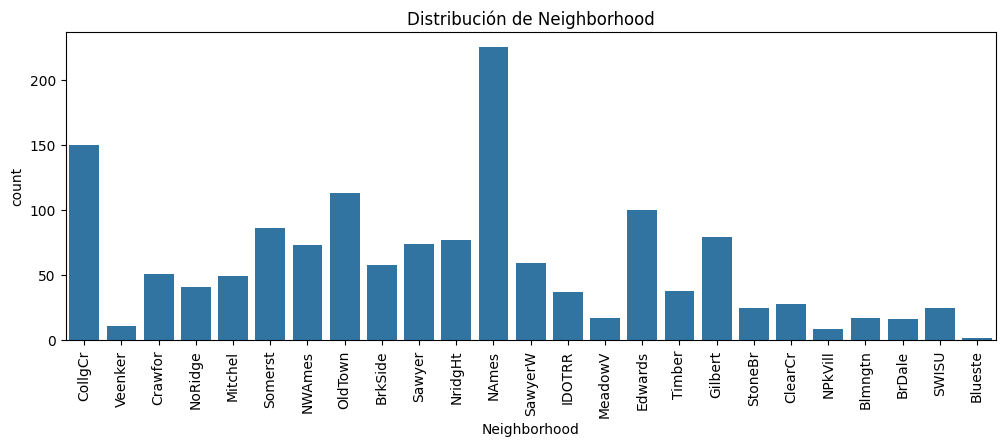

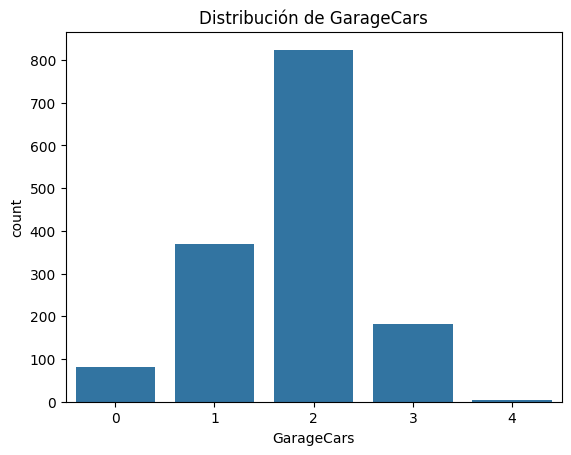

In [5]:
# =========================
# 3. Análisis descriptivo
# =========================

# Resumen estadístico
display(df_clean.describe())

# Distribución de la variable objetivo
sns.histplot(df_clean["SalePrice"], kde=True, bins=30)
plt.title("Distribución de SalePrice")
plt.show()

# Distribución de variables categóricas
sns.countplot(x="OverallQual", data=df_clean)
plt.title("Distribución de OverallQual")
plt.show()

plt.figure(figsize=(12,4))
sns.countplot(x="Neighborhood", data=df_clean)
plt.title("Distribución de Neighborhood")
plt.xticks(rotation=90)
plt.show()

sns.countplot(x="GarageCars", data=df_clean)
plt.title("Distribución de GarageCars")
plt.show()


Top correlaciones:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64


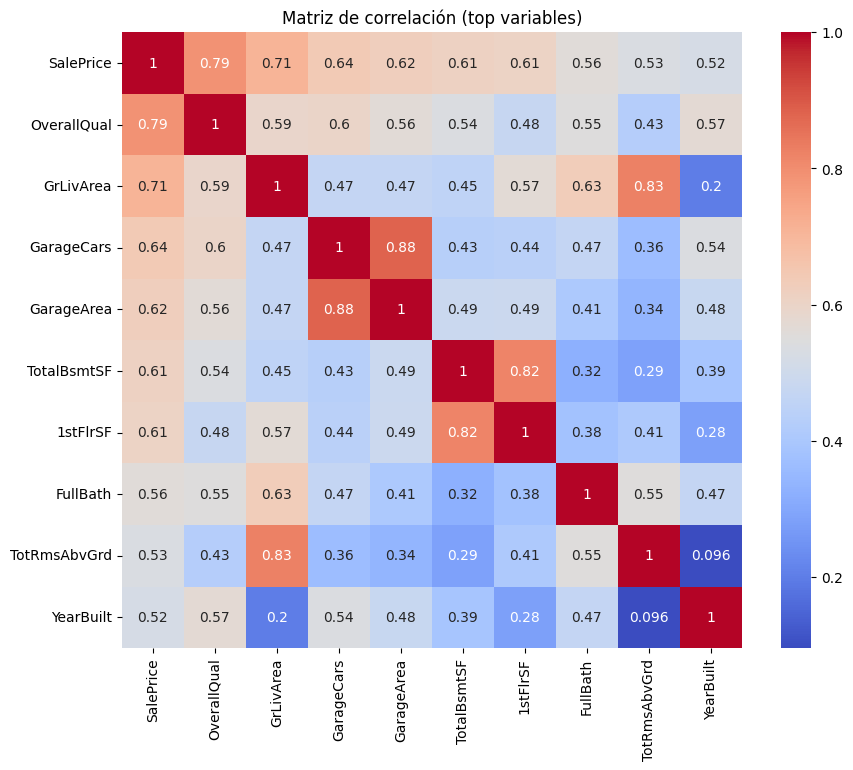

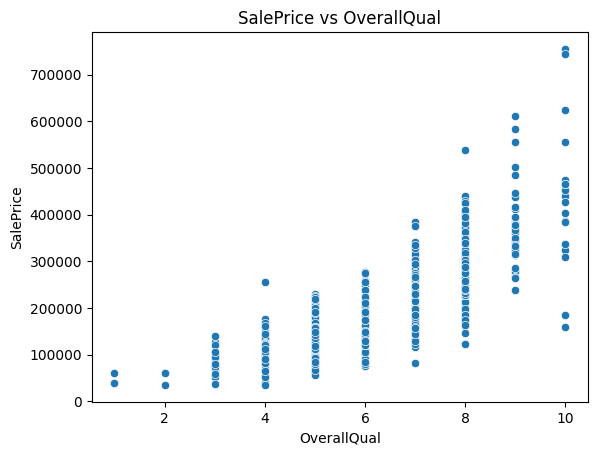

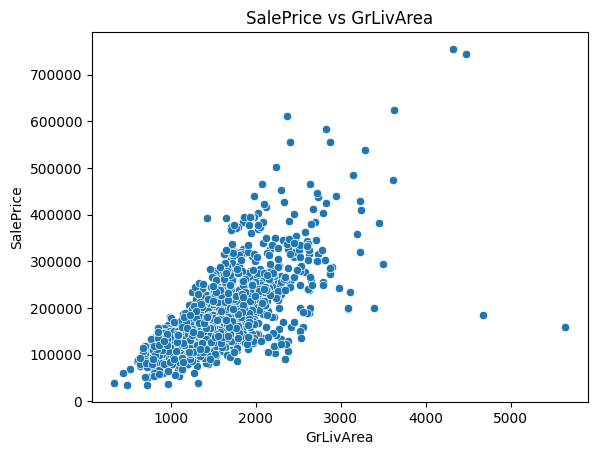

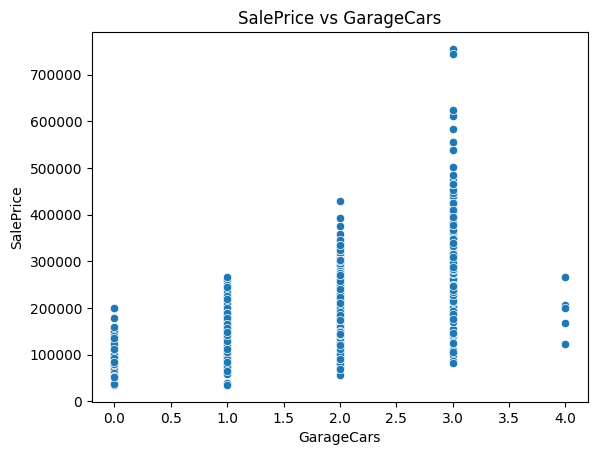

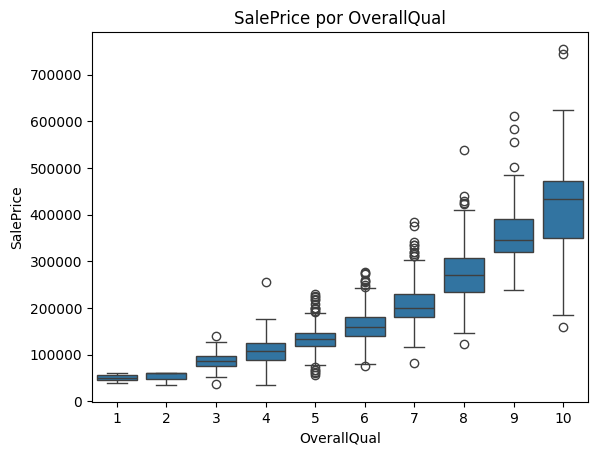

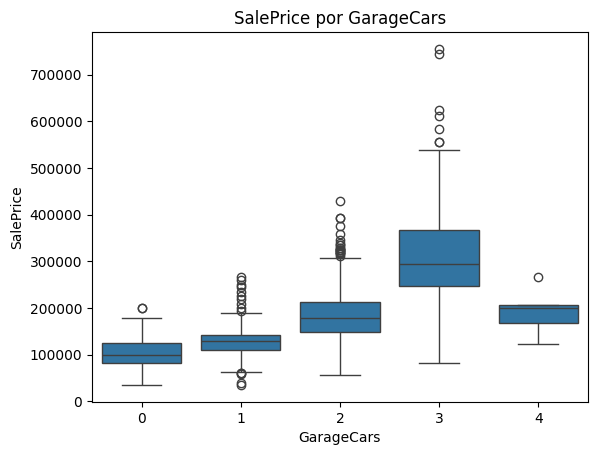

In [6]:
# =========================
# 4. Análisis exploratorio
# =========================

# Correlación numérica con SalePrice
corr = df_clean.corr(numeric_only=True)
top_corr = corr["SalePrice"].sort_values(ascending=False).head(10)
print("Top correlaciones:\n", top_corr)

plt.figure(figsize=(10,8))
sns.heatmap(corr[top_corr.index].loc[top_corr.index], annot=True, cmap="coolwarm")
plt.title("Matriz de correlación (top variables)")
plt.show()

# Scatterplots para las 3 más correlacionadas
for col in top_corr.index[1:4]:
    sns.scatterplot(x=df_clean[col], y=df_clean["SalePrice"])
    plt.title(f"SalePrice vs {col}")
    plt.show()

# Boxplots para categóricas
sns.boxplot(x="OverallQual", y="SalePrice", data=df_clean)
plt.title("SalePrice por OverallQual")
plt.show()

sns.boxplot(x="GarageCars", y="SalePrice", data=df_clean)
plt.title("SalePrice por GarageCars")
plt.show()


In [7]:
# =========================
# 5. Conclusión
# =========================
from IPython.display import Markdown as md

md("""
### Conclusión

De acuerdo con el análisis:

- La **calidad general (OverallQual)** es la característica más influyente.
- El **área habitable sobre rasante (GrLivArea)** tiene alta correlación con el precio.
- El **tamaño del sótano (TotalBsmtSF)** y la **superficie de la primera planta (1stFlrSF)** también impactan fuertemente.
- El **garaje (GarageCars y GarageArea)** explica gran parte de la variabilidad.

➡️ El precio de una vivienda está principalmente determinado por **calidad, tamaño habitable y capacidad de garaje**.
""")



### Conclusión

De acuerdo con el análisis:

- La **calidad general (OverallQual)** es la característica más influyente.
- El **área habitable sobre rasante (GrLivArea)** tiene alta correlación con el precio.
- El **tamaño del sótano (TotalBsmtSF)** y la **superficie de la primera planta (1stFlrSF)** también impactan fuertemente.
- El **garaje (GarageCars y GarageArea)** explica gran parte de la variabilidad.

➡️ El precio de una vivienda está principalmente determinado por **calidad, tamaño habitable y capacidad de garaje**.
